# Sensibilidade do preço:

Pretendo analisar o efeito do preço na demanda de cada produto.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from rich.jupyter import display

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel("../data/online_retail_cleaned.xlsx")
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom


# Criando Receita:

definimos receita como:

$Receita = Quantidade \times Preço$

In [6]:
df["revenue"] = df["unit_price_cleaned"] * df["quantity_cleaned"]

df[['description_cleaned', 'unit_price_cleaned', 'quantity_cleaned', 'revenue']].head()

,description_cleaned,unit_price_cleaned,quantity_cleaned,revenue
0,party invites woodland,0.85,12,10.2
1,party invites balloon girl,0.85,12,10.2
2,party invites football,0.85,12,10.2
3,party invites spaceman,0.85,12,10.2
4,lovely bonbon sticker sheet,0.85,12,10.2


# Agrupando por produto (stock_code):

Criando um novo dataframe (product_df) contendo o preço médio, a quantidade vendida, a receita e as transações realizadas para cada produto.

In [7]:
product_df = (
    df.groupby("stock_code_cleaned")
      .agg(
          avg_price=("unit_price_cleaned", "mean"),
          total_quantity=("quantity_cleaned", "sum"),
          total_revenue=("revenue", "sum"),
          transactions=("invoice_no", "nunique")
      )
      .reset_index() # remove stock_code do índice
)

product_df.head()

,stock_code_cleaned,avg_price,total_quantity,total_revenue,transactions
0,10002,0.850000,823,699.55,49
1,10080,0.411905,291,114.41,21
2,10120,0.210000,193,40.53,29
3,10123,0.650000,5,3.25,3
4,10124,0.420000,33,13.86,7


# Gráfico - Preço vs Quantidade:

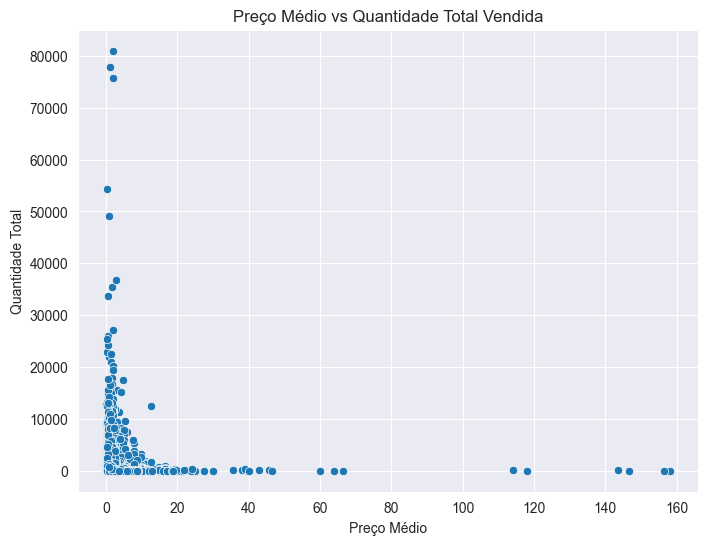

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=product_df,
    x="avg_price",
    y="total_quantity"
)
plt.title("Preço Médio vs Quantidade Total Vendida")
plt.xlabel("Preço Médio")
plt.ylabel("Quantidade Total")
plt.show()

#### Comportamento esperado:
- Quanto maior o preço, menor a demanda ***(região inferior a direita do gráfico)***.

- Quanto menor o preço, maior a demanda ***(região superior a esqueda do gráfico)***.

# Elasticidade-Preço da Demanda:

A elasticidade ($E_p$) mostra o quanto que o preço de um produto afeta em sua demanda (ou quantidade de produtos vendidos).

$ E_p = \dfrac{\% \text{Variação na quantidade demandada}}{\% \text{Variação no preço}}$

### Modelo log-log:

$\log{Q} = \alpha + \beta \log{P}$

O valor de $\beta$ é exatamente a elasticidade.

Características do $\beta$:

- $\beta < 0$ ***(Elasticidade Negativa)*** -> Demanda diminui com o aumento do preço.
- $| \beta |$ ***(Valor absoluto da Elasticidade)*** -> Intensidade de resposta do consumidor a alteração do preço.
    - $| \beta | < 1$ -> Demanda elástica <mark>***(Aumento de preço gera pequena redução na demanda)***</mark>
    - $| \beta | > 1$ -> Demanda inelástica <mark>***(Um pequeno aumento no preço gera uma grande queda na demanda)***</mark>

In [14]:
product_df["log_price"] = np.log(product_df["avg_price"])
product_df["log_quantity"] = np.log(product_df["total_quantity"])

x = product_df[["log_price"]]
y = product_df["log_quantity"]

model = LinearRegression()
model.fit(x, y)

elasticity = model.coef_[0]
print(elasticity)

-0.7035155258834016


##### O valor absoluto de $0.7$ para elasticidade indica demanda elástica, ou seja, um aumento no preço gera pouca queda na quantidade de produtos vendidos.

*Obs.: Note que essa valor foi calculado para ***todos os produtos***.*

# Elasticidade por produto: